# Final project: BackOrder Prediction
<hr>

# Objectives

Product backorder may be the result of strong sales performance (e.g. the product is in such high demand that production cannot keep up with sales). However, backorders can upset consumers, lead to canceled orders and decreased customer loyalty. Companies want to avoid backorders, but also avoid overstocking every product (leading to higher inventory costs).<br>
**Predicting whether a product will go on backorder.**

> Backorder is a common supply chain problem,impactinganinventorysystemservicelevelandeffectiveness. 
Identifying parts with the highest chances of shortage prior its occurrence can present a high opportunity to improve an overall company’s performance. <br>
In this project, machine learning classiﬁers are investigated in order to propose a predictive model for this imbalanced class problem,where there lative frequencyof items that goes into backorder is rare when compared to items that do not.<br>
Speciﬁc metrics such as area under the Receiver Operator Characteristic and precision-recall curves, sampling techniques and ensemble learning are employed in this particular task.

# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import pickle

In [2]:
from sklearn.model_selection import KFold
from sklearn.utils import resample
from sklearn.metrics import roc_curve,roc_auc_score,precision_recall_curve,confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


from sklearn.tree import export_graphviz
import graphviz
from sklearn.pipeline import make_pipeline

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,classification_report,roc_curve,auc
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


# 2. Importing and Organizing the data

A backorder is the order which could not be fulfilled by the company. Due to high demand of a product, the company was not able to keep up with the delivery of the order. The backordering can lead to upsetting customer as they couldn't get what they ordered and the loyalty will decrease.<br>
<br>
Also, company cannot overstock every product in their inventory to avoid such situation.<br>

There has to be a way for the company to know for which products they can face this problem.<br>

So, the company has shared a data file with different input features for each product and it hopes to find a pattern inside this data which can give them some insight.<br>

The data file contains the historical data for some weeks prior to the week we are trying to predict. 
The data has 23 columns including 22 features and one target column.<br>

**Outcome:** Whether the part went on backorder<br>
**Predictors:** Current inventory, sales history, forecasted sales, recommended stocking amount, part risk flags etc. (22 predictors in total)

### Attribute Information:

To model and predict the target, we’ll use the features columns, which are:<br>

 <br>

**sku –**                                    Random ID for the product<br>

**national_inv –**                   Current inventory level for the part<br>

**lead_time –**                        Transit time for product (if available)<br>

**in_transit_qty –**                Amount of product in transit from source<br>

**forecast_3_month –**       Forecast sales for the next 3 months<br>

**forecast_6_month –**       Forecast sales for the next 6 months<br>

**forecast_9_month –**       Forecast sales for the next 9 months<br>

**sales_1_month –**             Sales quantity for the prior 1 month time period<br>

**sales_3_month –**             Sales quantity for the prior 3 month time period<br>

**sales_6_month –**             Sales quantity for the prior 6 month time period<br>

**sales_9_month –**             Sales quantity for the prior 9 month time period<br>

**min_bank –**                        Minimum recommend amount to stock<br>

**potential_issue –**             Source issue for part identified<br>

**pieces_past_due –**          Parts overdue from source<br>

**perf_6_month_avg –**     Source performance for prior 6 month period<br>

**perf_12_month_avg –**   Source performance for prior 12 month period<br>

**local_bo_qty –**                  Amount of stock orders overdue<br>

**deck_risk –**                         Part risk flag<br>

**oe_constraint –**                Part risk flag<br>

**ppap_risk –**                        Part risk flag<br>

**stop_auto_buy –**              Part risk flag<br>

**rev_stop –**                          Part risk flag<br>

**went_on_backorder –**   Product actually went on backorder. This is the target value.<br>

## ----------Import and view the data-----------#

In [43]:
merged = pd.read_csv("Training_Dataset_v2.csv", low_memory=False)

In [44]:
#first 10 entries
merged.head(10)

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
5,1044198,13.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.82,0.87,0.0,No,No,No,Yes,No,No
6,1044643,1095.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
7,1045098,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.00,0.0,Yes,No,Yes,Yes,No,No
8,1045815,140.0,NaN,0.0,15.0,114.0,152.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
9,1045867,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.82,0.87,0.0,No,No,No,Yes,No,No


In [45]:
#.info() function is used to get a concise summary of the dataframe
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
sku                  1687861 non-null object
national_inv         1687860 non-null float64
lead_time            1586967 non-null float64
in_transit_qty       1687860 non-null float64
forecast_3_month     1687860 non-null float64
forecast_6_month     1687860 non-null float64
forecast_9_month     1687860 non-null float64
sales_1_month        1687860 non-null float64
sales_3_month        1687860 non-null float64
sales_6_month        1687860 non-null float64
sales_9_month        1687860 non-null float64
min_bank             1687860 non-null float64
potential_issue      1687860 non-null object
pieces_past_due      1687860 non-null float64
perf_6_month_avg     1687860 non-null float64
perf_12_month_avg    1687860 non-null float64
local_bo_qty         1687860 non-null float64
deck_risk            1687860 non-null object
oe_constraint        1687860 non-null object
ppap_risk        

# ---------- Basic Data Manipulation-----------

In [46]:
#checking how many unique values are in columns
for col in merged.columns:
    print(col ,' : ', len(merged[col].unique()))

sku  :  1687861
national_inv  :  14970
lead_time  :  33
in_transit_qty  :  5231
forecast_3_month  :  7826
forecast_6_month  :  11115
forecast_9_month  :  13663
sales_1_month  :  5765
sales_3_month  :  10496
sales_6_month  :  14819
sales_9_month  :  18342
min_bank  :  5569
potential_issue  :  3
pieces_past_due  :  827
perf_6_month_avg  :  103
perf_12_month_avg  :  103
local_bo_qty  :  655
deck_risk  :  3
oe_constraint  :  3
ppap_risk  :  3
stop_auto_buy  :  3
rev_stop  :  3
went_on_backorder  :  3


In [47]:
# Checking type of each data
for i in merged.columns:
    for j in merged[i]:
        print(i,"          " ,type(j))
        break

sku            <class 'str'>
national_inv            <class 'float'>
lead_time            <class 'float'>
in_transit_qty            <class 'float'>
forecast_3_month            <class 'float'>
forecast_6_month            <class 'float'>
forecast_9_month            <class 'float'>
sales_1_month            <class 'float'>
sales_3_month            <class 'float'>
sales_6_month            <class 'float'>
sales_9_month            <class 'float'>
min_bank            <class 'float'>
potential_issue            <class 'str'>
pieces_past_due            <class 'float'>
perf_6_month_avg            <class 'float'>
perf_12_month_avg            <class 'float'>
local_bo_qty            <class 'float'>
deck_risk            <class 'str'>
oe_constraint            <class 'str'>
ppap_risk            <class 'str'>
stop_auto_buy            <class 'str'>
rev_stop            <class 'str'>
went_on_backorder            <class 'str'>


## Recode binary variables as 0 / 1 rather than No / Yes

In [48]:
#recode binary variables as 0 / 1 rather than No / Yes
for col in ['potential_issue',
            'deck_risk',
            'oe_constraint',
            'ppap_risk',
            'stop_auto_buy',
            'rev_stop',
            'went_on_backorder']:    
    merged[col]=pd.factorize(merged[col])[0]


In [49]:
#remove the two rows of all NA's
merged=merged[pd.notnull(merged['national_inv'])]


In [50]:
#Change the -99 placeholder to NA for perf_6_month_avg and perf_12_month_avg
merged['perf_6_month_avg']=merged['perf_6_month_avg'].replace(-99, np.NaN)
merged['perf_12_month_avg']=merged['perf_12_month_avg'].replace(-99, np.NaN)


In [51]:
merged.index

Int64Index([      0,       1,       2,       3,       4,       5,       6,
                  7,       8,       9,
            ...
            1687850, 1687851, 1687852, 1687853, 1687854, 1687855, 1687856,
            1687857, 1687858, 1687859],
           dtype='int64', length=1687860)

In [52]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1687860 entries, 0 to 1687859
Data columns (total 23 columns):
sku                  1687860 non-null object
national_inv         1687860 non-null float64
lead_time            1586967 non-null float64
in_transit_qty       1687860 non-null float64
forecast_3_month     1687860 non-null float64
forecast_6_month     1687860 non-null float64
forecast_9_month     1687860 non-null float64
sales_1_month        1687860 non-null float64
sales_3_month        1687860 non-null float64
sales_6_month        1687860 non-null float64
sales_9_month        1687860 non-null float64
min_bank             1687860 non-null float64
potential_issue      1687860 non-null int64
pieces_past_due      1687860 non-null float64
perf_6_month_avg     1558382 non-null float64
perf_12_month_avg    1565810 non-null float64
local_bo_qty         1687860 non-null float64
deck_risk            1687860 non-null int64
oe_constraint        1687860 non-null int64
ppap_risk           

In [53]:
merged['went_on_backorder'].unique()

array([0, 1], dtype=int64)

In [54]:
merged.describe(include="all")

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
count,1687860,1.687860e+06,1.586967e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,...,1.687860e+06,1.558382e+06,1.565810e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06
unique,1687860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2982851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.961118e+02,7.872267e+00,4.405202e+01,1.781193e+02,3.449867e+02,5.063644e+02,5.592607e+01,1.750259e+02,3.417288e+02,...,2.043724e+00,7.823812e-01,7.769763e-01,6.264507e-01,2.295706e-01,1.451542e-04,1.207648e-01,3.619139e-02,4.330928e-04,6.690721e-03
std,NaN,2.961523e+04,7.056024e+00,1.342742e+03,5.026553e+03,9.795152e+03,1.437892e+04,1.928196e+03,5.192378e+03,9.613167e+03,...,2.360165e+02,2.370141e-01,2.304902e-01,3.372224e+01,4.205568e-01,1.204713e-02,3.258538e-01,1.867661e-01,2.080638e-02,8.152275e-02
min,NaN,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,7.000000e-01,6.900000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,NaN,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,...,0.000000e+00,8.500000e-01,8.300000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,NaN,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,...,0.000000e+00,9.700000e-01,9.600000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [55]:
data.shape

(1687861, 23)

##  Missing Data Analysis
Surely, there is missing data. Let us now see how much of it is missing

Missing values in train data :  352421


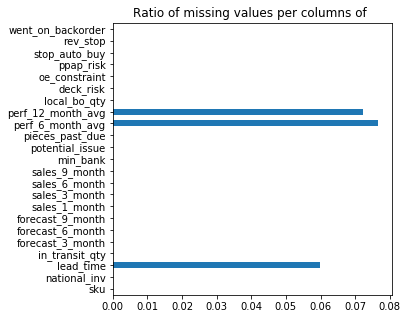

In [56]:
def check_missing_values(train_files):
       
        plt.figure(figsize=(5, 5))
        train_files.isnull().mean(axis=0).plot.barh()
        plt.title("Ratio of missing values per columns of ")
        
        train_missing=train_files.isnull().sum().sum()
        print('Missing values in train data : ',train_missing)
        
check_missing_values(merged)

In [57]:
merged.isna().sum()

sku                       0
national_inv              0
lead_time            100893
in_transit_qty            0
forecast_3_month          0
forecast_6_month          0
forecast_9_month          0
sales_1_month             0
sales_3_month             0
sales_6_month             0
sales_9_month             0
min_bank                  0
potential_issue           0
pieces_past_due           0
perf_6_month_avg     129478
perf_12_month_avg    122050
local_bo_qty              0
deck_risk                 0
oe_constraint             0
ppap_risk                 0
stop_auto_buy             0
rev_stop                  0
went_on_backorder         0
dtype: int64

#### Note:-
- This says we have missing values in lead_time around 6% od dataset and rest have only 1 data is missing.

**Inference**
- close to 6% of lead_time are missing
- rest have only 1 data is missing.

In [58]:
data.columns

Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

This shows the list of columns in the given dataset

### Define quantitative and categorical variable lists 

In [59]:

quantvars=['national_inv',
           'lead_time',
           'in_transit_qty',
           'forecast_3_month',
           'forecast_6_month',
           'forecast_9_month',
           'sales_1_month',
           'sales_3_month',
           'sales_6_month',
           'sales_9_month',
           'min_bank',
           'pieces_past_due',
           'perf_6_month_avg',
           'perf_12_month_avg',
           'local_bo_qty']

catvars=['potential_issue',
            'deck_risk',
            'oe_constraint',
            'ppap_risk',
            'stop_auto_buy',
            'rev_stop',
            'went_on_backorder']

catpred=['potential_issue',
            'deck_risk',
            'oe_constraint',
            'ppap_risk',
            'stop_auto_buy',
            'rev_stop']

## Descriptive Statistics and Plots

- I considered descriptive statistics and plots for the variables in the dataset. Some of the descriptive findings are:

- **Several predictors are skewed or have huge outliers**
    - Part quantities (stock, sales etc.) can be on very different scales
- **Descriptively, backordered parts are on average associated with:**
    - lower inventory
    - lower sales forecasts
    - worse sales history
    - more frequent potential risk flags
- **Several predictors are highly correlated**
    - Especially the sales and forecast variables which are related and have overlap (e.g. 3 month sales history and 6 month sales history)

## ---Quantitative variables-----#

In [60]:
#summary of quantitative variables
merged[quantvars].describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
national_inv,1687860.0,496.111782,29615.233831,-27256.0,4.00,15.00,80.00,12334404.0
lead_time,1586967.0,7.872267,7.056024,0.0,4.00,8.00,9.00,52.0
in_transit_qty,1687860.0,44.052022,1342.741731,0.0,0.00,0.00,0.00,489408.0
forecast_3_month,1687860.0,178.119284,5026.553102,0.0,0.00,0.00,4.00,1427612.0
forecast_6_month,1687860.0,344.986664,9795.151861,0.0,0.00,0.00,12.00,2461360.0
forecast_9_month,1687860.0,506.364431,14378.923562,0.0,0.00,0.00,20.00,3777304.0
sales_1_month,1687860.0,55.926069,1928.195879,0.0,0.00,0.00,4.00,741774.0
sales_3_month,1687860.0,175.025930,5192.377625,0.0,0.00,1.00,15.00,1105478.0
sales_6_month,1687860.0,341.728839,9613.167104,0.0,0.00,2.00,31.00,2146625.0
sales_9_month,1687860.0,525.269701,14838.613523,0.0,0.00,4.00,47.00,3205172.0


In [61]:
#means by backorder status
merged.pivot_table(values=quantvars,index=['went_on_backorder'])

,forecast_3_month,forecast_6_month,forecast_9_month,in_transit_qty,lead_time,local_bo_qty,min_bank,national_inv,perf_12_month_avg,perf_6_month_avg,pieces_past_due,sales_1_month,sales_3_month,sales_6_month,sales_9_month
went_on_backorder,,,,,,,,,,,,,,,
0,178.259421,345.662315,507.579735,44.319523,7.883053,0.600148,52.964627,499.309119,0.777516,0.782944,2.033727,56.104982,175.670378,343.092551,527.417690
1,157.314354,244.678916,325.939520,4.338617,6.322545,4.531391,24.219782,21.432746,0.699906,0.702262,3.527849,29.364474,79.350748,139.271230,206.377668


## ---Categorical variables-----#

In [62]:
#Percentage of each categorical variable
for col in catvars:
    print(col,": ",round(merged[col].mean()*100,2),"%" )

potential_issue :  0.05 %
deck_risk :  22.96 %
oe_constraint :  0.01 %
ppap_risk :  12.08 %
stop_auto_buy :  3.62 %
rev_stop :  0.04 %
went_on_backorder :  0.67 %


In [63]:
#Proportions of categorical predictors stratified by went_on_backorder
merged.pivot_table(values=(catpred),index=["went_on_backorder"])

,deck_risk,oe_constraint,potential_issue,ppap_risk,rev_stop,stop_auto_buy
went_on_backorder,,,,,,
0,0.229974,0.000141,0.000511,0.120529,0.000436,0.036154
1,0.169663,0.000708,0.004516,0.155760,0.000000,0.041707


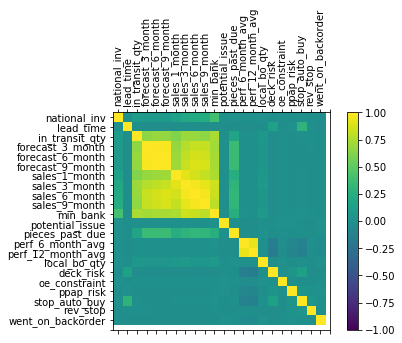

In [64]:
# Correction Matrix Plot of all variables
varnames=list(merged)[1:]    
correlations = merged[varnames].corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,23,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(varnames,rotation=90)
ax.set_yticklabels(varnames)
plt.show()

# Dealing with Missing Data

In the steps seen above, we have successfully dealt with the missing data. But we have not dealt with the class imbalance (if any) in the data. Simply put, Data Imbalance is a condition where the samples belonging to one or more 'majority' class labels of a labelled dataset heavily outnumber the sample belonging to the other 'minority' classes.   

Data imbalance critically affects the modeling as the models won't have sufficient data belonging to minority classes to train on and this leads to biased models, ultimately leading to poor performance on test data.   

**Predictors have missing data:**

    - lead_time (6% missing)
    - rest data have 1 missing value except sku
<br>
From comparing descriptive statistics of the complete dataset to the data with missing values, we find that the data is clearly not missing at random. For these three variables, we impute the medians for the missing observations. We also create an indicator variable for whether any variable was missing, in hope to help account for the non-randomness of the missing data.

In [65]:
#View count/percentage of missing cells
tot=merged.isnull().sum().sort_values(ascending=False)
perc=(round(100*merged.isnull().sum()/merged.isnull().count(),1)).sort_values(ascending=False)
missing_data = pd.concat([tot, perc], axis=1, keys=['Missing', 'Percent'])
missing_data

,Missing,Percent
perf_6_month_avg,129478,7.7
perf_12_month_avg,122050,7.2
lead_time,100893,6.0
went_on_backorder,0,0.0
sales_6_month,0,0.0
national_inv,0,0.0
in_transit_qty,0,0.0
forecast_3_month,0,0.0
forecast_6_month,0,0.0
forecast_9_month,0,0.0


In [66]:
#create a variable for any missing data
merged['anymissing']=(  pd.isnull(merged['perf_6_month_avg'] ) | 
                        pd.isnull(merged['perf_12_month_avg'] ) | 
                        pd.isnull(merged['lead_time'] ) ).astype(int) 


In [67]:
merged.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder,anymissing
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,0,0,0,0,0,0,1
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.99,0.99,0.0,0,0,0,0,0,0,0
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,1,0,0,0,0,0,1
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.10,0.13,0.0,0,0,0,0,0,0,0
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,1,0,0,0,0,0,1



Compare complete data to data with any missing variables
> Means of quantitative variables <br>
> Proportions of categorical variables


In [68]:
merged.pivot_table(values=(quantvars),index=['anymissing'])


,forecast_3_month,forecast_6_month,forecast_9_month,in_transit_qty,lead_time,local_bo_qty,min_bank,national_inv,perf_12_month_avg,perf_6_month_avg,pieces_past_due,sales_1_month,sales_3_month,sales_6_month,sales_9_month
anymissing,,,,,,,,,,,,,,,
0,190.271741,368.361439,540.51329,45.306993,7.776911,0.635443,51.856120,380.279089,0.778698,0.782381,2.161210,56.542168,177.163838,349.589190,539.703988
1,31.853728,63.650612,95.35277,28.947335,13.070841,0.518219,63.799379,1890.260469,0.415820,NaN,0.629675,48.510766,149.294328,247.122585,351.540308


In [69]:
merged.pivot_table(values=(catvars),index=['anymissing'])


,deck_risk,oe_constraint,potential_issue,ppap_risk,rev_stop,stop_auto_buy,went_on_backorder
anymissing,,,,,,,
0,0.201497,0.000157,0.000565,0.117138,0.000237,0.022726,0.006971
1,0.567455,0.000000,0.000209,0.164414,0.002796,0.198258,0.003321


In [70]:
#impute the medians
merged.fillna(merged.median(), inplace=True)

In [71]:
merged.index

Int64Index([      0,       1,       2,       3,       4,       5,       6,
                  7,       8,       9,
            ...
            1687850, 1687851, 1687852, 1687853, 1687854, 1687855, 1687856,
            1687857, 1687858, 1687859],
           dtype='int64', length=1687860)

## Key considerations of the data:

- Imbalanced outcome: Only 0.7% of parts actually go on backorder.
- Outliers and skewed predictors: Part quantities (stock, sales etc.) can be on very different scales.
- Missing data: A few variables have data that are missing (not at random).
- n>>p: There are many observations (1.9 million) relative to the number of predictors (22).

# Modeling

- We use 10-fold cross-validation and fit our random forest models. We fit models with and without down sampling and optimize tuning parameters by fitting models over a grid of values for the maximum variables to try and minimum leaf size.

> Note: we down sample the majority data during cross-validation, rather than before. This is so that each fold’s testing dataset is the same for every model (down sampling or no down sampling). Only the training datasets in each fold were down sampled.

In [74]:
#create a blank dataframe to fill
merged_pred=pd.DataFrame(data=None,index=merged.index)
merged_pred.head()

""
0
1
2
3
4


### K-Fold Cross Validation
> - Since the Backorder dataset does not have a separate ‘unlabeled’ test dataset, it is obvious that we need to split the training data to obtain a validation dataset (for each year’s data). 
- If the split was done in a simple way, we end up with just one validation dataset and the inherent difference in the class label distributions for training and validation datasets would lead to poor performance of the model on the training and hence on validation sets.
- Alternatively, in K-Fold Cross Validation, the training dataset is split into K bins. In each iteration (total = K iterations), one bin is retained as a validation dataset and the other bins of data are used for training the model. The performance metrics (like accuracy, precision, recall, etc) are noted for each validation set. 
- After all the iterations, each of the bins will have served as validation dataset at least once (depending on K). The metrics are averaged over all the K iterations and the final metrics are output. 

In [75]:
#Define folds for  10-fold Cross Validation
kf = KFold(n_splits=10,shuffle=True,random_state=123)  
kf

KFold(n_splits=10, random_state=123, shuffle=True)

In [76]:
#Define index of dataset (to help in data sepparations within folds)
ind=merged.index

In [77]:
for train_index, test_index in kf.split(merged):
    
    #Define Training data
    merged_train=merged[ind.isin(train_index)]
    y_train=merged_train['went_on_backorder']
    X_train=merged_train.drop(['sku','went_on_backorder'],axis=1)

    #Define Test data
    merged_test=merged[ind.isin(test_index)]
    y_test=merged_test['went_on_backorder']
    X_test=merged_test.drop(['sku','went_on_backorder'],axis=1)

    #Define down-sampled training data
    train_majority = merged_train[y_train==0]
    train_minority = merged_train[y_train==1]
    n_minority = len(train_minority)
    train_majority_downsampled = resample(train_majority, 
                                 replace=False,    
                                 n_samples=n_minority,     
                                 random_state=123) 
    train_downsampled = pd.concat([train_majority_downsampled, train_minority])
    y_train_downsampled = train_downsampled['went_on_backorder']
    X_train_downsampled = train_downsampled.drop(['sku','went_on_backorder'],axis=1)


In [78]:
#Function to fit models
def fitrandomforests(n_est,maxfeat,minleaf):

    #names of model predictions based on tuning parameter inputs
    varname= "pred_nest%s_feat%s_leaf%s" % (n_est,maxfeat,minleaf)
    varname2= "pred_down_nest%s_feat%s_leaf%s" % (n_est,maxfeat,minleaf)

    #Fit a Random Forest model
    rf=RandomForestClassifier(n_estimators=n_est,
                              max_features=maxfeat,
                              min_samples_leaf=minleaf)
    rf.fit(X_train,y_train)
    preds=rf.predict_proba(X_test)[:,1]
    merged_test[varname]=preds

    #Fit a Random Forest model on downsampled data
    rfd=RandomForestClassifier(n_estimators=n_est,
                               max_features=maxfeat,
                               min_samples_leaf=minleaf)
    rfd.fit(X_train_downsampled,y_train_downsampled)
    predsd=rfd.predict_proba(X_test)[:,1]
    merged_test[varname2]=preds

In [79]:
def roc_curve_acc(Y_test, Y_pred,method):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color='darkorange',label='%s AUC = %0.3f'%(method, roc_auc))
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [80]:
#Tuning parameter grids
    
#number of trees (more is better for prediction but slower)
n_est=50
#maximum features tried
maxfeatgrid=[3,5,7]
#Minimum samples per leaf
minleafgrid=[5,10,30]

In [81]:
#fit models
for feat in maxfeatgrid:
    for leaf in minleafgrid:
        fitrandomforests(n_est,feat,leaf)

C:\Users\sahil.kumar\.conda\envs\ml\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\sahil.kumar\.conda\envs\ml\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sahil.kumar\.conda\envs\ml\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [82]:
merged_pred.head()

""
0
1
2
3
4


In [83]:
#Combine predictions for this fold with previous folds
merged_pred = pd.concat([merged_pred,merged_test])


C:\Users\sahil.kumar\.conda\envs\ml\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [84]:
merged_test.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pred_nest50_feat5_leaf10,pred_down_nest50_feat5_leaf10,pred_nest50_feat5_leaf30,pred_down_nest50_feat5_leaf30,pred_nest50_feat7_leaf5,pred_down_nest50_feat7_leaf5,pred_nest50_feat7_leaf10,pred_down_nest50_feat7_leaf10,pred_nest50_feat7_leaf30,pred_down_nest50_feat7_leaf30
4,1044048,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000018,0.000018,0.000014,0.000014,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12,1047199,18.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000003,0.000003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
39,1166209,3870.0,8.0,0.0,0.0,0.0,0.0,26.0,96.0,171.0,...,0.000000,0.000000,0.002222,0.002222,0.000000,0.000000,0.001053,0.001053,0.000000,0.000000
41,1174215,10.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000027,0.000027,0.000003,0.000003,0.000021,0.000021,0.000000,0.000000,0.000000,0.000000
60,1060585,6.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000081,0.000081,0.000061,0.000061,0.000027,0.000027,0.000041,0.000041,0.000058,0.000058


In [141]:
merged_test.isna().sum()

sku                  0
national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
anymissing           0
dtype: int64

In [85]:

#drop NA's from dataframe caused by the method for combining datasets from each loop iteration
merged_pred=merged_pred.dropna() 

In [86]:
merged_pred.isna().sum()

anymissing                       0
deck_risk                        0
forecast_3_month                 0
forecast_6_month                 0
forecast_9_month                 0
in_transit_qty                   0
lead_time                        0
local_bo_qty                     0
min_bank                         0
national_inv                     0
oe_constraint                    0
perf_12_month_avg                0
perf_6_month_avg                 0
pieces_past_due                  0
potential_issue                  0
ppap_risk                        0
pred_down_nest50_feat3_leaf10    0
pred_down_nest50_feat3_leaf30    0
pred_down_nest50_feat3_leaf5     0
pred_down_nest50_feat5_leaf10    0
pred_down_nest50_feat5_leaf30    0
pred_down_nest50_feat5_leaf5     0
pred_down_nest50_feat7_leaf10    0
pred_down_nest50_feat7_leaf30    0
pred_down_nest50_feat7_leaf5     0
pred_nest50_feat3_leaf10         0
pred_nest50_feat3_leaf30         0
pred_nest50_feat3_leaf5          0
pred_nest50_feat5_le

In [87]:
merged_pred.head()

,anymissing,deck_risk,forecast_3_month,forecast_6_month,forecast_9_month,in_transit_qty,lead_time,local_bo_qty,min_bank,national_inv,...,pred_nest50_feat7_leaf30,pred_nest50_feat7_leaf5,rev_stop,sales_1_month,sales_3_month,sales_6_month,sales_9_month,sku,stop_auto_buy,went_on_backorder
4,1.0,1.0,0.0,0.0,0.0,0.0,8.0,0.0,2.0,8.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,4.0,1044048,0.0,0.0
12,1.0,1.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,18.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1047199,0.0,0.0
39,1.0,1.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,3870.0,...,0.000000,0.000000,0.0,26.0,96.0,171.0,763.0,1166209,0.0,0.0
41,1.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,2.0,10.0,...,0.000000,0.000021,0.0,0.0,0.0,0.0,0.0,1174215,0.0,0.0
60,1.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,6.0,...,0.000058,0.000027,0.0,0.0,0.0,0.0,0.0,1060585,0.0,0.0


## ROC Curves

In [88]:
#View AUC for each model and each tuning parameter specification
for feat in maxfeatgrid:
    for leaf in minleafgrid:
        #Random forest for given tuning parameters
        varname1="pred_nest50_feat%s_leaf%s" % (feat,leaf)
        rocscore1=roc_auc_score(merged_pred['went_on_backorder'],merged_pred[varname1])
        print( round(rocscore1,4 ) , varname1 )
        #Down Sampled Random Forest for given tuning parameters
        varname2="pred_down_nest50_feat%s_leaf%s" % (feat,leaf)
        rocscore2=roc_auc_score(merged_pred['went_on_backorder'],merged_pred[varname2])
        print( round(rocscore2,4) , varname2 )

0.9787 pred_nest50_feat3_leaf5
0.9787 pred_down_nest50_feat3_leaf5
0.9755 pred_nest50_feat3_leaf10
0.9755 pred_down_nest50_feat3_leaf10
0.9681 pred_nest50_feat3_leaf30
0.9681 pred_down_nest50_feat3_leaf30
0.9745 pred_nest50_feat5_leaf5
0.9745 pred_down_nest50_feat5_leaf5
0.9746 pred_nest50_feat5_leaf10
0.9746 pred_down_nest50_feat5_leaf10
0.9724 pred_nest50_feat5_leaf30
0.9724 pred_down_nest50_feat5_leaf30
0.9735 pred_nest50_feat7_leaf5
0.9735 pred_down_nest50_feat7_leaf5
0.9742 pred_nest50_feat7_leaf10
0.9742 pred_down_nest50_feat7_leaf10
0.9714 pred_nest50_feat7_leaf30
0.9714 pred_down_nest50_feat7_leaf30


In [89]:
#ROC Curves for top performing models

#Define false positive rates/true positive rates / thresholds 
#Best random forest model
fpr, tpr, thresholds = roc_curve(merged_pred['went_on_backorder'],
                                 merged_pred['pred_nest50_feat3_leaf5'])

In [90]:
#Best down sampled random forest model
fpr2, tpr2, thresholds2 = roc_curve(merged_pred['went_on_backorder'],
                                    merged_pred['pred_down_nest50_feat7_leaf5'])


In [91]:
#AUC for best Random Forest and Random Forest Down sampled Models
roc_auc=roc_auc_score(merged_pred['went_on_backorder'],
                      merged_pred['pred_nest50_feat3_leaf5'])
roc_auc2=roc_auc_score(merged_pred['went_on_backorder'],
                      merged_pred['pred_down_nest50_feat7_leaf5'])

(0, 1)

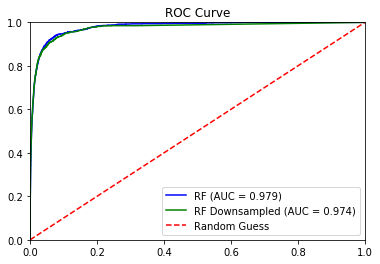

In [92]:
#plot ROC Curve
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label='RF (AUC = %0.3f)'% roc_auc)
plt.plot(fpr2, tpr2, 'g', label='RF Downsampled (AUC = %0.3f)'% roc_auc2)
plt.plot([0,1],[0,1],'r--', label='Random Guess')
plt.legend(loc='lower right')
plt.xlim([0,1])
plt.ylim([0,1])

**Observation:**
We view AUC values for each model and plot the ROC curves for the top random forest model and down sampled random forest model. The random forest model with a maximum feature parameter of 3 and minimum leaf size of 5 had the highest AUC (.978), which is very good. The best down sampled model performed slightly worse (AUC = .973).

## Finding Balance Between Precision and Recall

We could use the above ROC curve and pick a threshold for classification that corresponds to the point on the line for our desired balance between the true positive rate and false positive rate. Instead, we will look at two different measures, precision and recall:<br>
> - **Precision:** the proportion of predicted backorders that actually go on backorder
> - **Recall:** the proportion of backordered items that are predicted to go on backorder
<br>

If we set a **low threshold** for classification, we predict that parts go on backorder more often. This leads to:

> - **Higher recall:** we correctly anticipate a higher percentage of the backordered items
> - **Lower precision:** more of the items predicted to go on backorder never actually do
<br>

If we set a **high threshold** for classification, we do not predict that parts go on backorder as often. This leads to:

> - **Lower recall:** we fail to anticipate a higher percentage of the backordered items
> - **Higher precision:** a higher percentage of the items we predict to go on backorder actually do

In [93]:
#define precision, recall, and corresponding threshold for model with highest AUC
precision, recall, threshold = precision_recall_curve(merged_pred['went_on_backorder'],
                                                      merged_pred['pred_nest50_feat3_leaf5'])


Text(0.5, 0, 'Threshold')

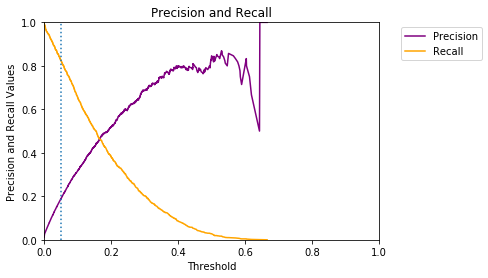

In [94]:
#plot Precision and Recall for a given threshold.
plt.title('Precision and Recall')
plt.plot(threshold,precision[1:],'purple',label='Precision')
plt.plot(threshold,recall[1:],'orange', label='Recall')
plt.axvline(x=.05,linestyle=":")
plt.legend(loc=2,bbox_to_anchor=(1.05, 1))
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('Precision and Recall Values')
plt.xlabel('Threshold')

# Side Note: why we don’t use accuracy


Setting the threshold at 0.05, we can create a confusion matrix that has an accuracy of 97%. If we were to never predict backorder (i.e. completely ignoring the data), we would have an accuracy of 99.7%, simply because products go on backorder only 0.7% of the time. However, this is clearly not a useful model, which highlights how accuracy is an inappropriate metric for imbalanced outcomes.

In [95]:
#Confusion Matrix 
merged_pred['optimal_classification']=merged_pred['pred_nest50_feat3_leaf5']>.05
pd.crosstab(merged_pred['went_on_backorder'],
            merged_pred['optimal_classification'],
            rownames=['Went on Backorder'],
            colnames=['Predicted going on Backorder?'])

Predicted going on Backorder?,False,True
Went on Backorder,,
0.0,163369,4231
1.0,206,980


In [96]:
#Accuracy of model
accuracy_score(merged_pred['went_on_backorder'],merged_pred['optimal_classification'])


0.9737122747147275

In [97]:
#Accuracy of "naive" (never-predict-backorder) model
merged_pred['naive_estimator']=0
accuracy_score(merged_pred['went_on_backorder'],merged_pred['naive_estimator'])

0.9929733508703329

## Final Model Fit and Variable Importance

Finally, we fit the random forest model with optimal tuning parameters on the entire dataset. We then could use this model to predict whether parts will go on backorder (that is, if I actually worked for the company and would be getting new data in the future!).

We also plot the variable importances produced by the random forest model.
- The current inventory is the most important variable for prediction, followed by many of the sales history and forecast variables, and many of the part flag risk indicators are on the low end of the importance graph.

However, we should avoid making any strong judgements of the relative importance of variables with different types. The Gini method of computing importance is biased towards continuous variables and variables with many categories, and so it is not surprising that the binary categorical variables have low importance compared to the quantitative variables, many of which on a very large scale.

## Randomforset

### Random Forests Classifier
> - A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. <br>
- In random forests, each tree in the ensemble is built from a sample drawn with replacement from the training set. 
- Also, when splitting a node during the construction of the tree, the split that is chosen is no longer the best split among all features. Instead, the split that is picked is the best split among a random subset of the features. 
- As a result of this randomness, the bias of the forest usually slightly increases but, due to averaging, its variance also decreases, usually more than compensating for the increase in bias, hence yielding an overall better model. 
- In my model,the number of estimators used are 10 and we have considered ‘Entropy’ as a measure of the quality of a split.

In [98]:
#Fit model on entire dataset, 
rf=RandomForestClassifier(n_estimators=10,
                          max_features=3,
                          min_samples_leaf=5)
y=merged['went_on_backorder']
X=merged.drop(['sku','went_on_backorder'],axis=1)
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [99]:
#importance of variables
list(zip(list(X),rf.feature_importances_))
importance = rf.feature_importances_
importance = pd.DataFrame(importance, index=X.columns,columns=["Importance"])
importance["Std"] = np.std([rf.feature_importances_ for tree in rf.estimators_], axis=0)
importance=importance.sort_values(['Importance'],ascending=False)


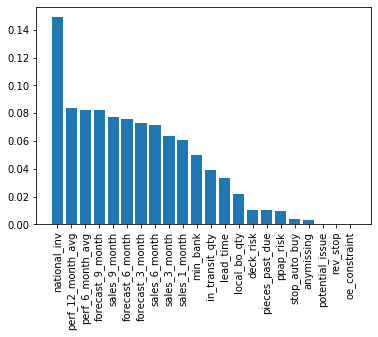

In [100]:
#plot importances
xlim = range(importance.shape[0])
plt.bar(xlim, importance['Importance'], yerr=importance['Std'], align="center")
plt.xticks(range(0,22), importance.index,rotation=90)
plt.show()

In [101]:
rf.score(X_train,y_train)

0.9942425451294671

## Logistic Regression

In [102]:

lr = LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\sahil.kumar\.conda\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [103]:
lr.score(X_test,y_test)

0.9928726316163663

### XGBoost
XGBoost improves the gradient boosting method even further.
> **XGBoost** (*extreme gradient boosting*) regularises data better than normal gradient boosted Trees.

It was developed by Tianqi Chen in C++ but now has interfaces for Python, R, Julia.

XGBoost's objective function is the sum of loss function evaluated over all the predictions and a regularisation function for all predictors ($j$ trees). In the formula $f_j$ means a prediction coming from the $j^th$ tree.

$$
obj(\theta) = \sum_{i}^{n} l(y_i - \hat{y_i}) +  \sum_{j=1}^{j} \Omega (f_j)
$$

Loss function depends on the task being performed (classification, regression, etc.) and a regularization term is described by the following equation:

$$
\Omega(f) = \gamma T + \frac{1}{2} \lambda \sum_{j=1}^{T}w_j^2
$$

First part ($\gamma T$) is responsible for controlling the overall number of created leaves, and the second term ($\frac{1}{2} \lambda \sum_{j=1}^{T}w_j^2$) watches over the scores.


**Mathematics Involved**
Unlike the other tree-building algorithms, XGBoost doesn’t use entropy or Gini indices. Instead, it utilises gradient (the error term) and hessian for creating the trees. Hessian for a Regression problem is the *number of residuals* and for a classification problem. Mathematically, Hessian is a second order derivative of the loss at the current estimate given as:
![image.png](attachment:image.png)


where **L** is the loss function. 

- Initialise the tree with only one leaf.
- compute the similarity using the formula
$$
Similarity= \frac {Gradient^2}{ hessian +\lambda}
$$
Where $\lambda $ is the regularisation term.
- Now for splitting data into a tree form, calculate
$$
Gain=  left similarity+right similarity-similarity for root
$$ 
- For tree pruning, the parameter $ \gamma$ is used. The algorithm starts from the lowest level of the tree and then starts pruning based on the value of $\gamma$.


 If $Gain- \gamma < 0$, remove that branch. Else, keep the branch 
 
- Learning is done using the equation
$$
New Value= old Value+ \eta * prediction
$$

where $\eta$ is the learning rate


In [104]:
# xgboost
xgb = XGBClassifier()
xgb = xgb.fit(X_train, y_train)
xgb

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [105]:
xgb.score(X_test,y_test)

0.9933762278861991

## Support Vector Machine

- **Support Vector Machine** (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges.<br> 
- However,  it is mostly used in classification problems. 
- In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. 
- Then, we perform classification by finding the hyper-plane that differentiates the two classes very well (look at the below snapshot).

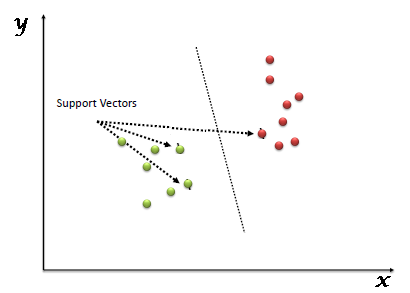

Support Vectors are simply the co-ordinates of individual observation. The SVM classifier is a frontier which best segregates the two classes (hyper-plane/ line).

In [ ]:
svc = SVC()
svc = svc.fit(X_train, y_train)
svc


Start training Support Vector Machine...


## Implemented Models

### I made several modeling decisions to address these issues:

**Random forest estimators are used:**
   >- Perform well with imbalanced data typically
   >- Robust to outliers and the skewed predictors: Because they are using tree partitioning algorithms and not producing coefficient estimates, outliers and skewness are not as much of a concern as for other predictive models.
 
<br>

**Down sampling**: to account for the imbalanced outcome, we try down sampling the data of parts that didn’t go on backorder.
  >- We choose down sampling over other similar methods that resample the minority group (e.g. up sampling or SMOTE) as these are more computationally burdensome with a large sample size.

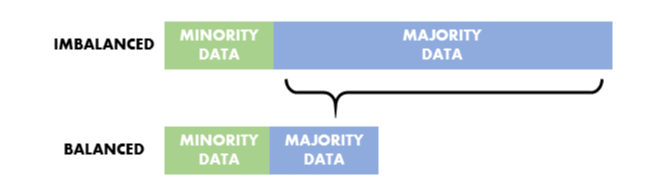

## Conclusion:- 
I have tried with different model like 
* Logistic Regression
* Support Vector Machine
* Extreme Gradient Boosting Classifier
* Random forest classifier <br>
XGBoost  & Random forest classifier with parameter tuning. XGBoost and Random forest classifier model having almost similar accuracy score. But I observed that Random forest classifier is performing well on imbalanced data as compare to other models.

## References

https://docs.scipy.org/doc/numpy-1.14.0/reference/
https://pandas.pydata.org/
https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.arff.loadarff.html
https://github.com/iskandr/fancyimpute
https://pypi.org/project/impyute/
http://scikit-learn.org/stable/modules/preprocessing.html
http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
https://docs.python.org/3/library/collections.html
http://xgboost.readthedocs.io/en/latest/python/python_api.html
http://scikit-learn.org/stable/modules/svm.html
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
http://contrib.scikit-learn.org/imbalanced-learn/stable/generated/imblearn.ensemble.BalancedBaggingClassifier.html
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
https://docs.python.org/2/library/random.html
http://scikit-learn.org/stable/modules/classes.html

## End of Project